In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
train=pd.read_csv('train_loan.csv') #training data
data=train.copy()
test=pd.read_csv('test_loan.csv') #test data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe() #description of tha data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.duplicated().any() #to make sure there is not any duplicate row

False

In [6]:
#Checking if column is categorical or numerical
def utils_recognize_type(data, col, max_cat=20):
    if (data[col].dtype == str) | (data[col].nunique() < max_cat):
        return "categorical"
    else:
        return "numerical"
dtype_dic={col:utils_recognize_type(train, col, max_cat=20) for col in train.columns} 
coltype=pd.Series(dtype_dic)
coltype

Loan_ID                numerical
Gender               categorical
Married              categorical
Dependents           categorical
Education            categorical
Self_Employed        categorical
ApplicantIncome        numerical
CoapplicantIncome      numerical
LoanAmount             numerical
Loan_Amount_Term     categorical
Credit_History       categorical
Property_Area        categorical
Loan_Status          categorical
dtype: object

c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LoanAmount'>

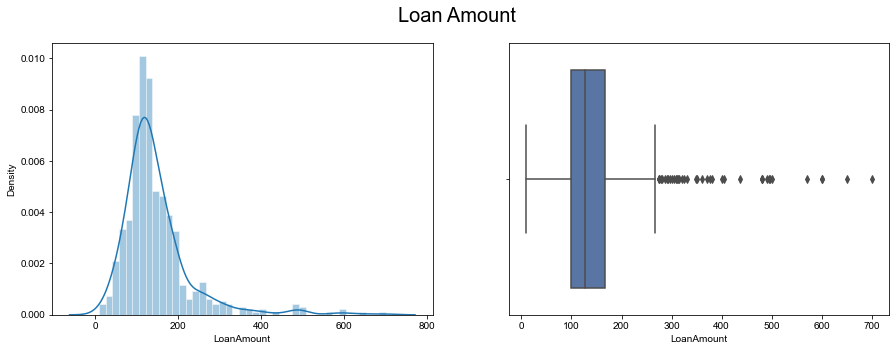

In [7]:
# We have three numerical variables and rest are categorical
# Now we will visualize at our numerical data 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),  sharex=False, sharey=False)
fig.suptitle('Loan Amount', fontsize=20)
sns.set(style='darkgrid')
sns.distplot(train['LoanAmount'],ax=ax[0])
sns.boxplot(train['LoanAmount'],ax=ax[1])

c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ApplicantIncome'>

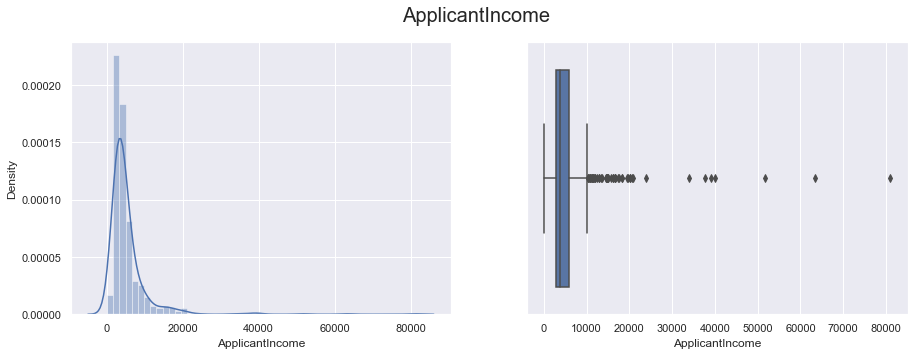

In [8]:
# From the above plot we see that Loan Amount have lot of outliers.We will have to remove that before modelling
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),  sharex=False, sharey=False)
fig.suptitle('ApplicantIncome', fontsize=20)
sns.set(style='darkgrid')
sns.distplot(train['ApplicantIncome'],ax=ax[0])
sns.boxplot(train['ApplicantIncome'],ax=ax[1])

c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CoapplicantIncome'>

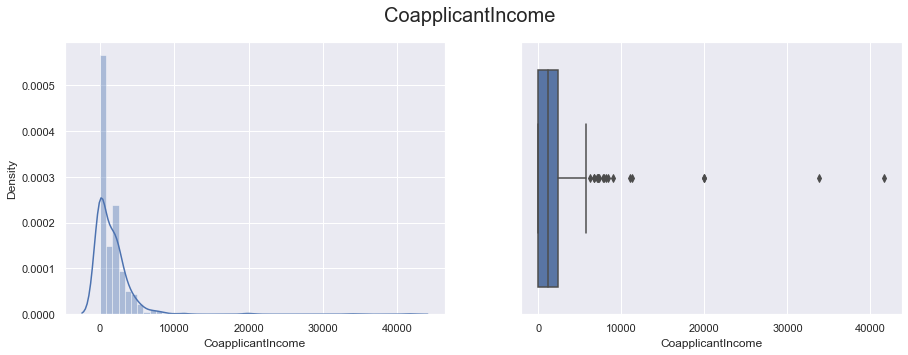

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),  sharex=False, sharey=False)
fig.suptitle('CoapplicantIncome', fontsize=20)
sns.set(style='darkgrid')
sns.distplot(train['CoapplicantIncome'],ax=ax[0])
sns.boxplot(train['CoapplicantIncome'],ax=ax[1])
# distribution is right skewed

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

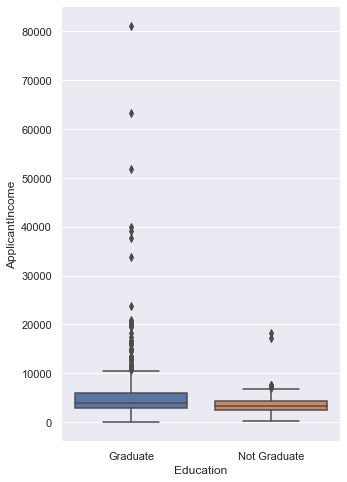

In [10]:
# From the above plot we see that 'AplicantIncome' have lot of outliers.We will have to remove that before modelling
plt.figure(figsize=(5,8))
sns.boxplot(x='Education',y='ApplicantIncome',data=train)
# It's obvious that graduate earns more than non graduate

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

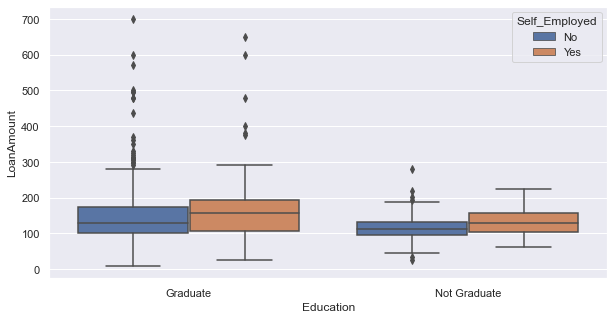

In [11]:
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=train,x='Education',hue='Self_Employed',y='LoanAmount')
# Those who are graduate tends to take higher amount of loan

In [12]:
temp=train.Credit_History.value_counts(ascending=True)
print(temp)
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})
print(train.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=np.mean))

0.0     89
1.0    475
Name: Credit_History, dtype: int64
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(365.36363636363626, 0.5, 'Probability of getting a Loan')

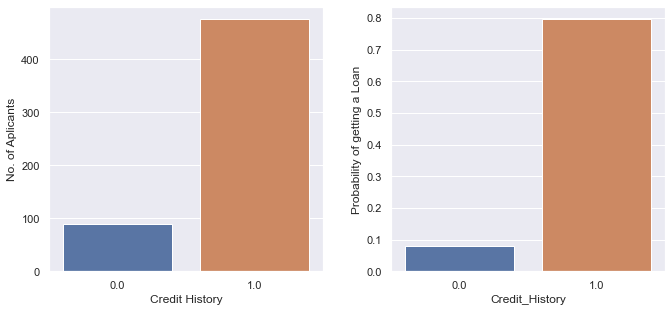

In [13]:
#From above pivot table we can clearly see that those who have a credit history as 1 have probability of more that 0.79
# to avail loan. Now I will plot Probbality of getting loan vs Credit History
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.0)
sns.barplot(data=train,x='Credit_History',y='Loan_Status',ci=None,ax=ax[1])
ax[0].set_xlabel('Credit History')
ax[0].set_ylabel('No. of Aplicants')
sns.barplot(x=temp.index,y=temp.values,ax=ax[0])
ax[1].set_ylabel('Probability of getting a Loan')

(array([0, 1, 2]),
 [Text(0, 0, 'Semiurban'), Text(1, 0, 'Urban'), Text(2, 0, 'Rural')])

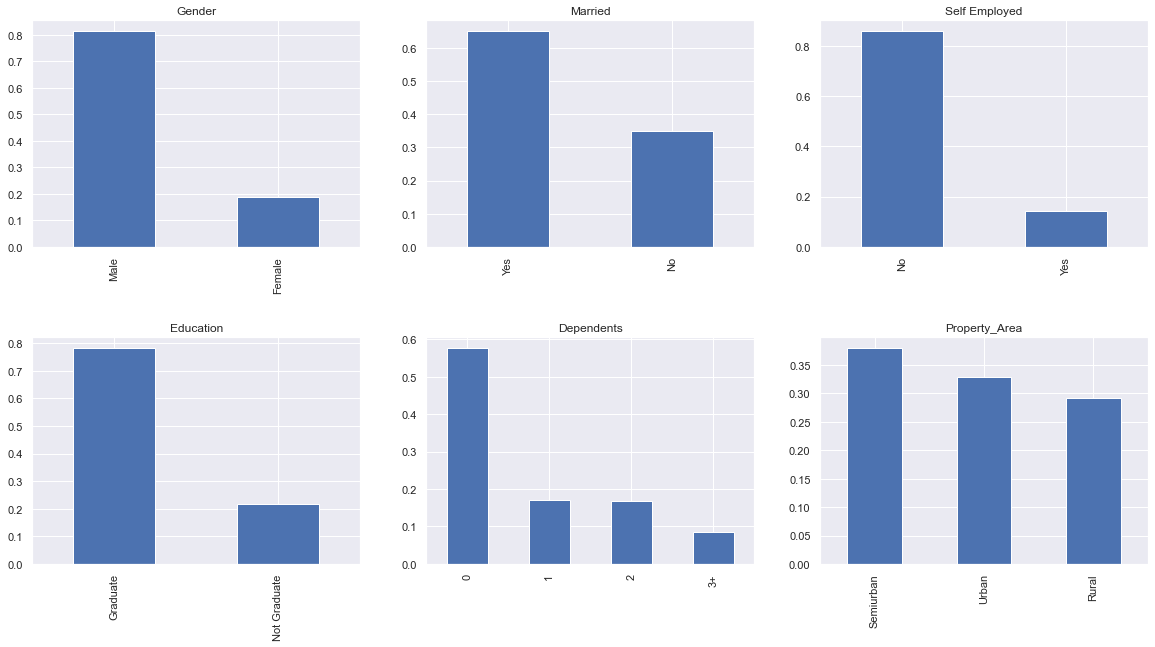

In [14]:
plt.subplots_adjust(hspace=0.4)
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))
plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(234)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(235)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(236)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Property_Area'>

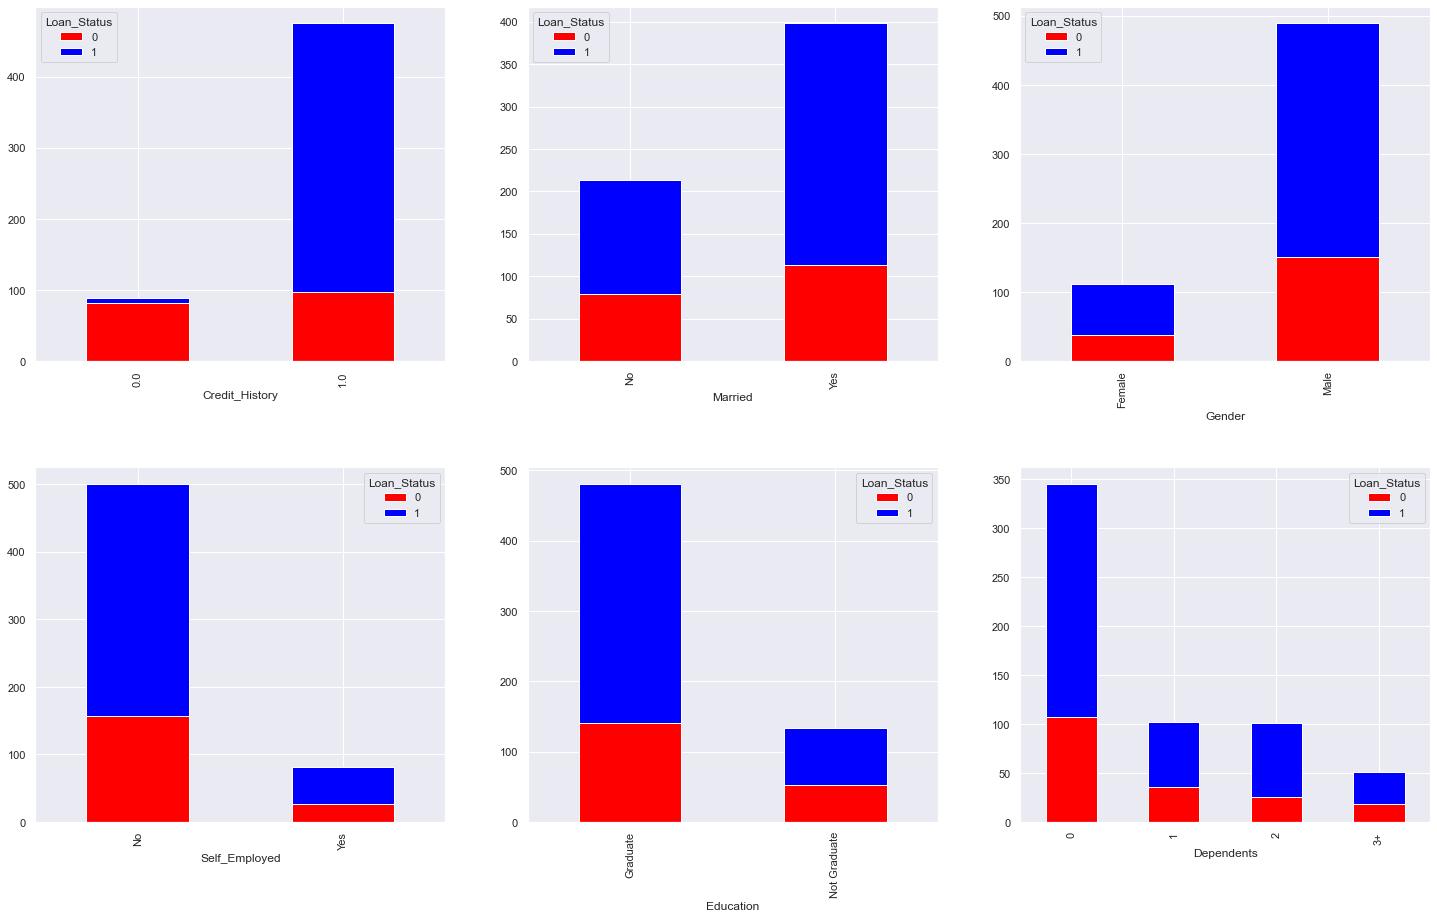

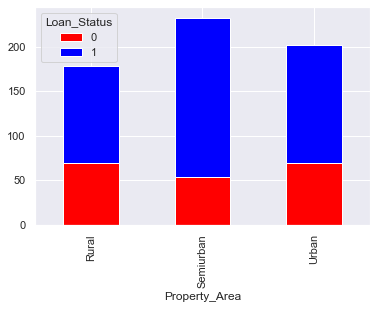

In [15]:
fig,ax=plt.subplots(2,3,figsize=(25,15))
plt.subplots_adjust(hspace=0.3)
pd.crosstab(train['Credit_History'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'],ax=ax[0][0])
pd.crosstab(train['Married'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'],ax=ax[0][1])
pd.crosstab(train['Gender'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'],ax=ax[0][2])
pd.crosstab(train['Self_Employed'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'],ax=ax[1][0])
pd.crosstab(train['Education'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'],ax=ax[1][1])
pd.crosstab(train['Dependents'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'],ax=ax[1][2])
pd.crosstab(train['Property_Area'], train['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'])

# Handling missing data and outliers

In [18]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# We will impute missing data in train as well as test data using train data median mode
#First I will impute missing data in train data
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
train['Dependents']=train['Dependents'].apply(lambda x: str(x).strip('+')[0]).astype('float64')
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [20]:
#Imputing missing data in test data using train data
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
test['Dependents']=test['Dependents'].apply(lambda x: str(x).strip('+')[0]).astype('float64')
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [21]:
#making sure that there are no missing values left after imputaion
print(test.apply(lambda x:(x.isnull()).sum(),axis=0),train.apply(lambda x:(x.isnull()).sum(),axis=0))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<AxesSubplot:>

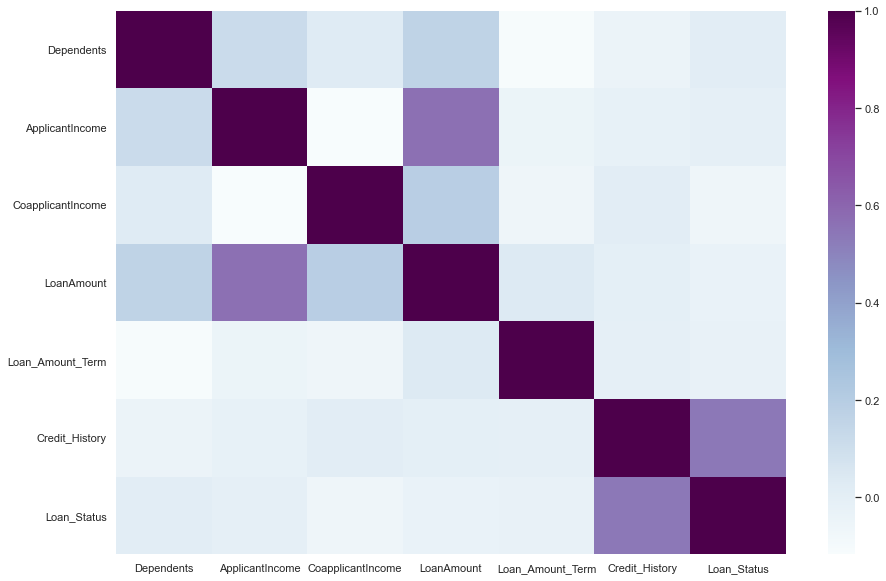

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),cmap='BuPu')

In [23]:
#We have seen during data visualization that loan amount have lot of outliers,so I will take lograthmic of loan amount
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount']) # Doing same for test data

#I am going to combine Applicant Income and Coapplicant Income and take log of the total income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome'] # Doing same for test data

train['TotalIncome_log'] = np.log(train['TotalIncome'])
test['TotalIncome_log'] = np.log(test['TotalIncome']) # doing same for test data

c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

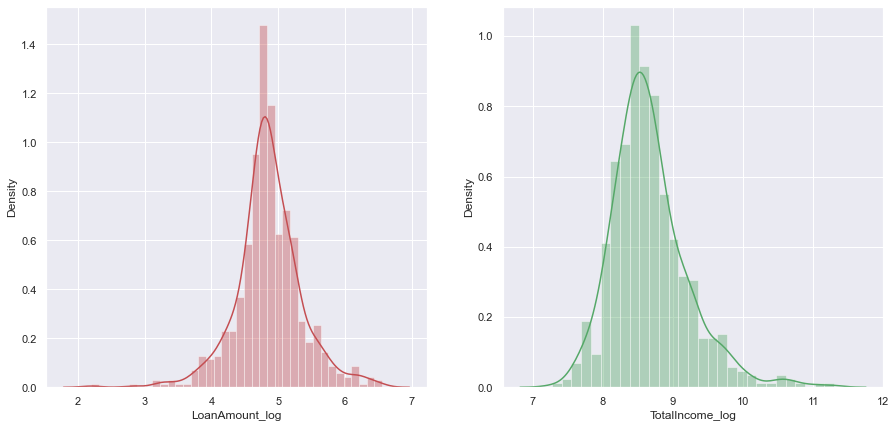

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.distplot(train['LoanAmount_log'],color='r',ax=ax[0])
sns.distplot(train['TotalIncome_log'],color='g',ax=ax[1])

<AxesSubplot:>

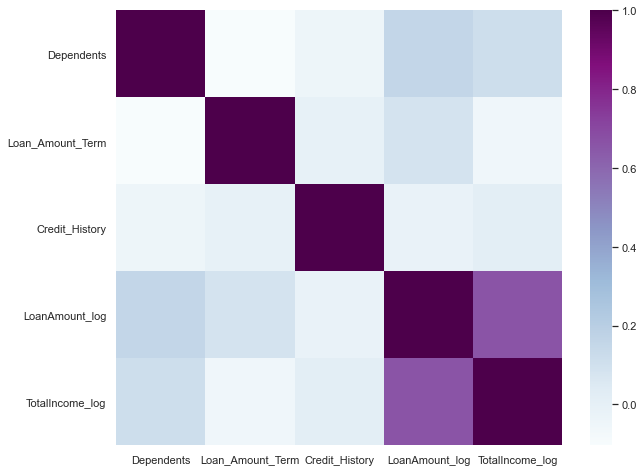

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(train.drop(['ApplicantIncome','Loan_ID','CoapplicantIncome','Loan_Status','LoanAmount','TotalIncome'],axis=1).corr(),cmap='BuPu')

# Modeling

In [26]:
#Modelling part
Y=train['Loan_Status'] # seprate target variable from train data
X=train.drop(['ApplicantIncome','Loan_ID','CoapplicantIncome','Loan_Status','LoanAmount','TotalIncome'],axis=1)
test_data=test.drop(['ApplicantIncome','Loan_ID','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1)

# One hot encoding for the categorical variable 
X=pd.get_dummies(X)
test_data=pd.get_dummies(test_data)
test_data

,Dependents,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,360.0,1.0,4.700480,8.651724,0,1,0,1,1,0,1,0,0,0,1
1,1.0,360.0,1.0,4.836282,8.428581,0,1,0,1,1,0,1,0,0,0,1
2,2.0,360.0,1.0,5.337538,8.824678,0,1,0,1,1,0,1,0,0,0,1
3,2.0,360.0,1.0,4.605170,8.494129,0,1,0,1,1,0,1,0,0,0,1
4,0.0,360.0,1.0,4.356709,8.094378,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3.0,360.0,1.0,4.727388,8.663196,0,1,0,1,0,1,0,1,0,0,1
363,0.0,360.0,1.0,4.744932,8.490233,0,1,0,1,1,0,1,0,0,0,1
364,0.0,360.0,1.0,4.836282,8.564649,0,1,1,0,1,0,1,0,0,1,0
365,0.0,360.0,1.0,5.062595,8.908289,0,1,0,1,1,0,1,0,1,0,0


# Logistic Regression

In [27]:
#I am using GridSearchCV for tuning hyperparameter 'C'
grid={"C":np.logspace(-3,3,7)}
logclf=LogisticRegression(solver='liblinear',max_iter=1000)
logclf_cv=GridSearchCV(logclf,grid,scoring='accuracy',cv=5)
logclf_cv.fit(X,Y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [28]:
logclf_cv.best_params_ ,logclf_cv.best_score_,logclf_cv.best_estimator_

({'C': 0.1},
 0.809462881514061,
 LogisticRegression(C=0.1, max_iter=1000, solver='liblinear'))

In [29]:
#we get best value of C=0.1.Now fit our model using C=0.1
logclf=LogisticRegression(C=0.1,max_iter=1000)
logclf.fit(X,Y)
ypred=logclf.predict(test_data)
np.unique(ypred,return_counts=True)
# We get 308 prediction as 1 and rest as 0 for our test data

(array([0, 1], dtype=int64), array([ 59, 308], dtype=int64))

In [30]:
ypred_train=logclf.predict(X)
accuracy_score(Y,ypred_train)#checking accuracy for training data

0.8094462540716613

# Random Forest

In [32]:
rf=RandomForestClassifier().fit(X,Y)
ypredrf=rf.predict(X)
accuracy_score(Y,ypredrf)

1.0

In [33]:
# We got 1.0 accuracy on our train data,that's surely overfitting our training data
ypredrf_test=rf.predict(test_data)
np.unique(ypredrf_test,return_counts=True)

(array([0, 1], dtype=int64), array([ 94, 273], dtype=int64))

## Hyperparameter tuning for Random Forest using GridSearchCV

In [34]:
rf_clf=RandomForestClassifier()

In [35]:
param={'n_estimators':[10,15,20,25,50,75,100],'max_depth':[5,6,7,10]}
rf_grid=GridSearchCV(rf_clf,param)
rf_grid.fit(X,Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 10],
                         'n_estimators': [10, 15, 20, 25, 50, 75, 100]})

In [36]:
rf_grid.best_params_ ,rf_grid.best_score_,rf_grid.best_estimator_

({'max_depth': 5, 'n_estimators': 50},
 0.8045981607357058,
 RandomForestClassifier(max_depth=5, n_estimators=50))

In [37]:
#we got max_depth=5 and n_estimators=25 as our best parameter
model = RandomForestClassifier(n_estimators=25, max_depth=6)
model.fit(X,Y)
print('train data accuracy:',accuracy_score(model.predict(X),Y))
test_pred_rf=model.predict(test_data)

train data accuracy: 0.8322475570032574


<AxesSubplot:title={'center':'Feature Importance'}>

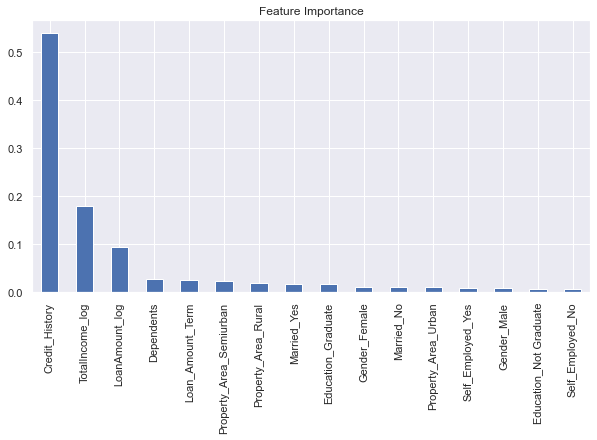

In [38]:
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,5),title='Feature Importance')

In [39]:
np.unique(test_pred_rf,return_counts=True) # taking a look how may got predicted as 1 or 0

(array([0, 1], dtype=int64), array([ 61, 306], dtype=int64))

# KNN

In [41]:
dic={}
for i in range(5,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    dic[i]=accuracy_score(knn.predict(X),Y)

Text(0, 0.5, 'accuracy of train data')

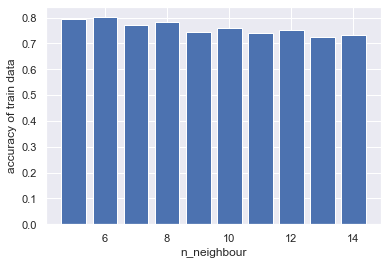

In [42]:
plt.bar(dic.keys(),dic.values())
plt.xlabel('n_neighbour')
plt.ylabel('accuracy of train data')

In [43]:
#So I will use n_neighbours=6
knn=KNeighborsClassifier(n_neighbors=6).fit(X,Y)
ypred_knn=knn.predict(test_data)
np.unique(ypred_knn,return_counts=True)

(array([0, 1], dtype=int64), array([ 70, 297], dtype=int64))